In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Biam va yek seri X tarif konim
X = np.linspace(-30, 50, 60) #Start, Stop, # of numbers
X

array([-30.        , -28.6440678 , -27.28813559, -25.93220339,
       -24.57627119, -23.22033898, -21.86440678, -20.50847458,
       -19.15254237, -17.79661017, -16.44067797, -15.08474576,
       -13.72881356, -12.37288136, -11.01694915,  -9.66101695,
        -8.30508475,  -6.94915254,  -5.59322034,  -4.23728814,
        -2.88135593,  -1.52542373,  -0.16949153,   1.18644068,
         2.54237288,   3.89830508,   5.25423729,   6.61016949,
         7.96610169,   9.3220339 ,  10.6779661 ,  12.03389831,
        13.38983051,  14.74576271,  16.10169492,  17.45762712,
        18.81355932,  20.16949153,  21.52542373,  22.88135593,
        24.23728814,  25.59322034,  26.94915254,  28.30508475,
        29.66101695,  31.01694915,  32.37288136,  33.72881356,
        35.08474576,  36.44067797,  37.79661017,  39.15254237,
        40.50847458,  41.86440678,  43.22033898,  44.57627119,
        45.93220339,  47.28813559,  48.6440678 ,  50.        ])

In [3]:
# Baraye tarif kardane y
shib = 2
arz_az_mabda = 1.5

y = (X * shib) + arz_az_mabda

In [4]:
y

array([-58.5       , -55.78813559, -53.07627119, -50.36440678,
       -47.65254237, -44.94067797, -42.22881356, -39.51694915,
       -36.80508475, -34.09322034, -31.38135593, -28.66949153,
       -25.95762712, -23.24576271, -20.53389831, -17.8220339 ,
       -15.11016949, -12.39830508,  -9.68644068,  -6.97457627,
        -4.26271186,  -1.55084746,   1.16101695,   3.87288136,
         6.58474576,   9.29661017,  12.00847458,  14.72033898,
        17.43220339,  20.1440678 ,  22.8559322 ,  25.56779661,
        28.27966102,  30.99152542,  33.70338983,  36.41525424,
        39.12711864,  41.83898305,  44.55084746,  47.26271186,
        49.97457627,  52.68644068,  55.39830508,  58.11016949,
        60.8220339 ,  63.53389831,  66.24576271,  68.95762712,
        71.66949153,  74.38135593,  77.09322034,  79.80508475,
        82.51694915,  85.22881356,  87.94067797,  90.65254237,
        93.36440678,  96.07627119,  98.78813559, 101.5       ])

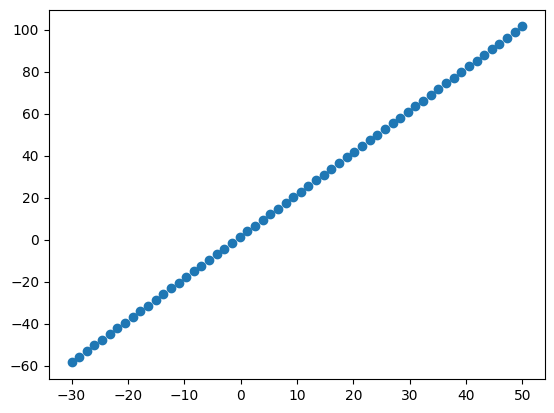

In [5]:
# biaim va nemoodar ro bebinim che shekli mishe
plt.scatter(X, y)
plt.show()

In [6]:
# Biam va noise ezafe konim be datamoon
shib = 2
arz_az_mabda = 1.5
noise = 0.2

y = (X * shib) + arz_az_mabda + (np.random.randn(len(X)) * noise * np.abs(X))

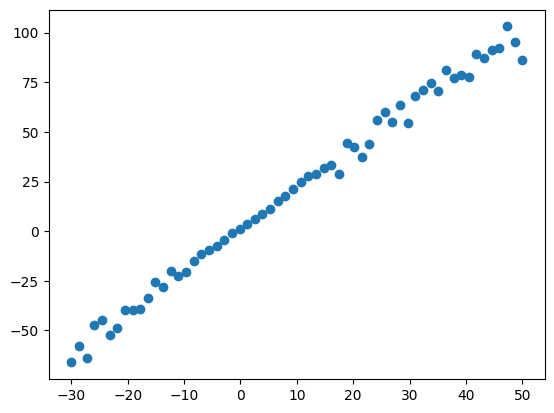

In [7]:
plt.scatter(X, y)
plt.show()

In [8]:
# Biam va noise ezafe konim be datamoon ama bar asase index e X
shib = 2
arz_az_mabda = 1.5
noise = 0.2
index = np.arange(len(X))

y = (X * shib) + arz_az_mabda + (np.random.randn(len(X)) * noise * index)

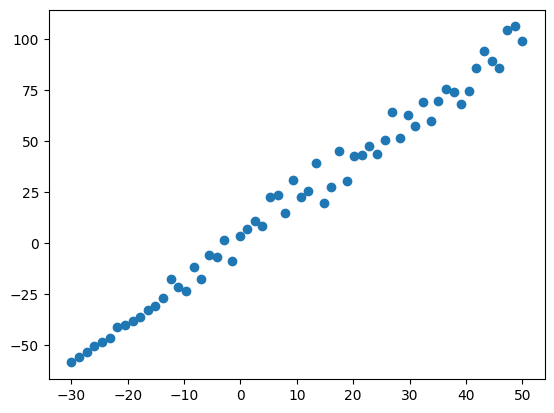

In [9]:
plt.scatter(X, y)
plt.show()

# Sakhtane Model be komake TF

1. Model ro be komake `Sequential API` e TF misazim.
2. Model ro `compile` mikonim.
* yani `optimizer` va `loss function` va `metrics` ro barash tain mikonam.
3. Model ro `train` mikonim.

In [10]:
X.shape

(60,)

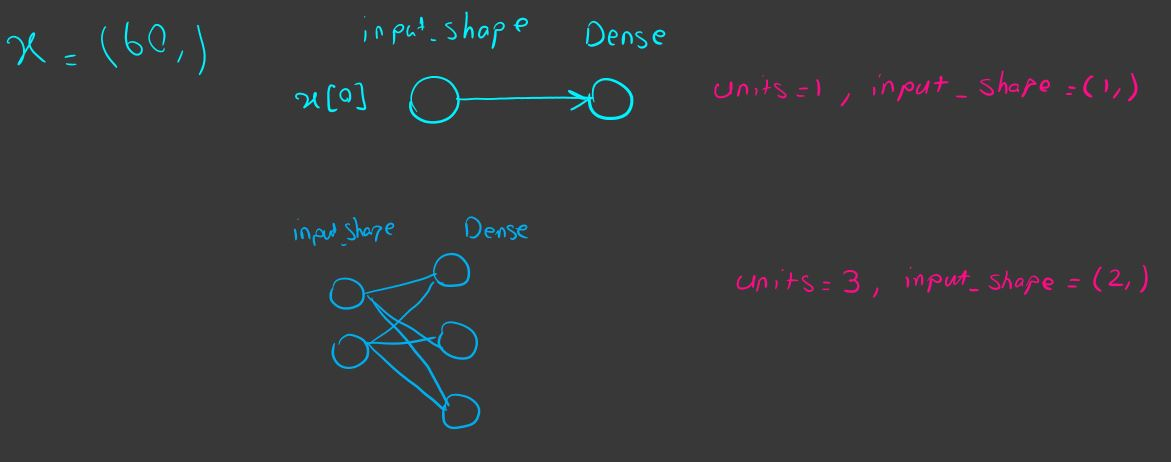

## First model

In [11]:
# 1. Sakhtane model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(1,))
])

In [12]:
# 2. Compile the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
    loss=tf.keras.losses.mse,
    metrics=['accuracy']
)

In [13]:
# 3. Fit the model
history = model.fit(X, y, epochs=20)

Epoch 1/20
2/2 [==============================] - 2s 14ms/step - loss: 2461.4045 - accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 7ms/step - loss: 1421.5981 - accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 8ms/step - loss: 827.1378 - accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 8ms/step - loss: 486.1136 - accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 7ms/step - loss: 290.5122 - accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 7ms/step - loss: 179.9453 - accuracy: 0.0000e+00
Epoch 7/20
2/2 [==============================] - 0s 7ms/step - loss: 115.7522 - accuracy: 0.0000e+00
Epoch 8/20
2/2 [==============================] - 0s 7ms/step - loss: 79.2523 - accuracy: 0.0000e+00
Epoch 9/20
2/2 [==============================] - 0s 7ms/step - loss: 58.6744 - accuracy: 0.0000e+00
Epoch 10/20
2/2 [==============================] - 0s 7ms/step - loss: 46.6113 - 

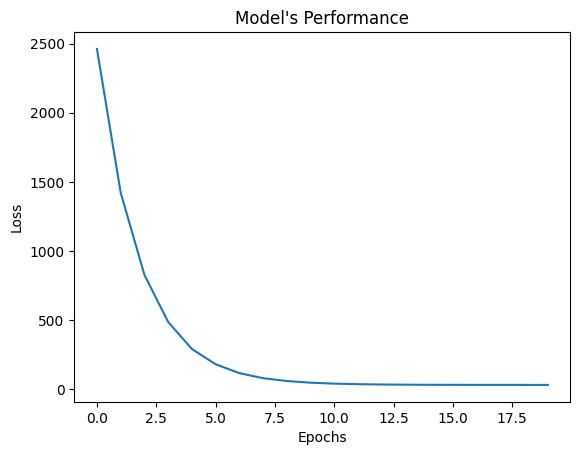

In [14]:
plt.plot(history.history["loss"])
plt.title("Model's Performance")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

## Second model
Inja mikhaim ghabl az sakhte model data moon ro normalize konim

In [15]:
X

array([-30.        , -28.6440678 , -27.28813559, -25.93220339,
       -24.57627119, -23.22033898, -21.86440678, -20.50847458,
       -19.15254237, -17.79661017, -16.44067797, -15.08474576,
       -13.72881356, -12.37288136, -11.01694915,  -9.66101695,
        -8.30508475,  -6.94915254,  -5.59322034,  -4.23728814,
        -2.88135593,  -1.52542373,  -0.16949153,   1.18644068,
         2.54237288,   3.89830508,   5.25423729,   6.61016949,
         7.96610169,   9.3220339 ,  10.6779661 ,  12.03389831,
        13.38983051,  14.74576271,  16.10169492,  17.45762712,
        18.81355932,  20.16949153,  21.52542373,  22.88135593,
        24.23728814,  25.59322034,  26.94915254,  28.30508475,
        29.66101695,  31.01694915,  32.37288136,  33.72881356,
        35.08474576,  36.44067797,  37.79661017,  39.15254237,
        40.50847458,  41.86440678,  43.22033898,  44.57627119,
        45.93220339,  47.28813559,  48.6440678 ,  50.        ])

Be komake `X.mean()` miangin data haro migirim va be komake `X.std()` standard deviation oon ro hesab mikonim chonke baraye normalize kardane data bayad har data ro menhaye miangin konim va bar standard deviation oon taghsim konim

In [16]:
X_normalized = (X - X.mean()) / X.std()
y_normalized = (y - y.mean()) / y.std()

* agar check konim mibinim ke X_normalized miangin esh 0 hast va standard deviation oon barabar ba 1 hastesh ke in model parakandegi data baraye Neural Network kheyli khoobe va yadgiri ro behtar mikone.

In [17]:
X_normalized

array([-1.7034199 , -1.64567685, -1.5879338 , -1.53019075, -1.47244771,
       -1.41470466, -1.35696161, -1.29921857, -1.24147552, -1.18373247,
       -1.12598942, -1.06824638, -1.01050333, -0.95276028, -0.89501723,
       -0.83727419, -0.77953114, -0.72178809, -0.66404504, -0.606302  ,
       -0.54855895, -0.4908159 , -0.43307286, -0.37532981, -0.31758676,
       -0.25984371, -0.20210067, -0.14435762, -0.08661457, -0.02887152,
        0.02887152,  0.08661457,  0.14435762,  0.20210067,  0.25984371,
        0.31758676,  0.37532981,  0.43307286,  0.4908159 ,  0.54855895,
        0.606302  ,  0.66404504,  0.72178809,  0.77953114,  0.83727419,
        0.89501723,  0.95276028,  1.01050333,  1.06824638,  1.12598942,
        1.18373247,  1.24147552,  1.29921857,  1.35696161,  1.41470466,
        1.47244771,  1.53019075,  1.5879338 ,  1.64567685,  1.7034199 ])

In [18]:
X_normalized.std()

0.9999999999999999

![tf1.JPG](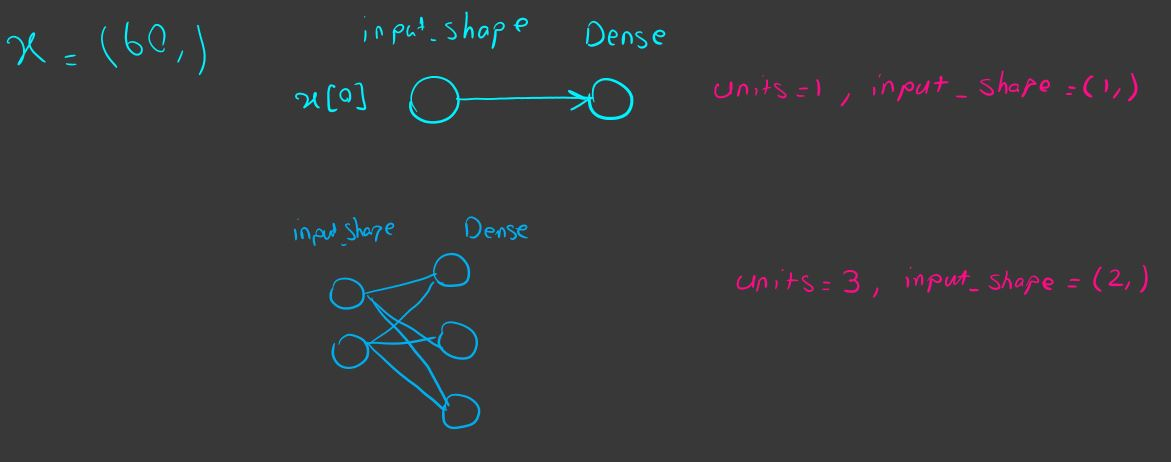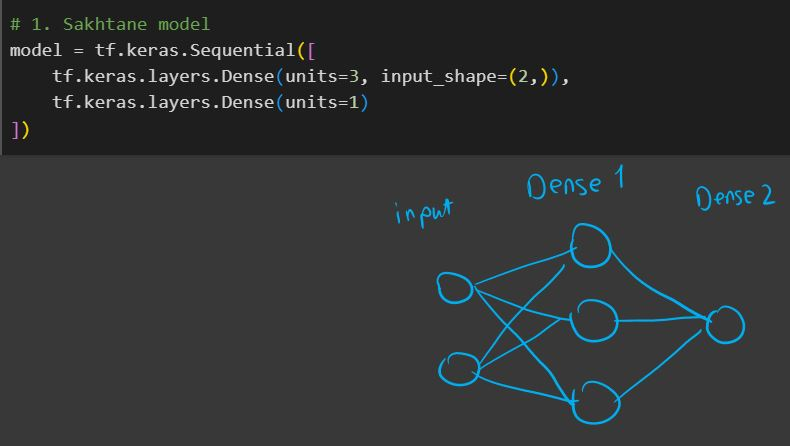)

In [19]:
# 1. Sakhtane model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(1,))
])

In [20]:
# 2. Compile the model
model_2.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.mse,
    metrics=['accuracy']
)

In [21]:
# 3. Fit the model
history = model_2.fit(X_normalized, y_normalized, epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 10ms/step - loss: 0.3976 - accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 0.3677 - accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 0.3399 - accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 0.3146 - accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 0.2912 - accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 0.2695 - accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 0.2494 - accuracy: 0.0000e+00
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2313 - accuracy: 0.0000e+00
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 0.2140 - accuracy: 0.0000e+00
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1985 - accuracy: 0.0000e+0

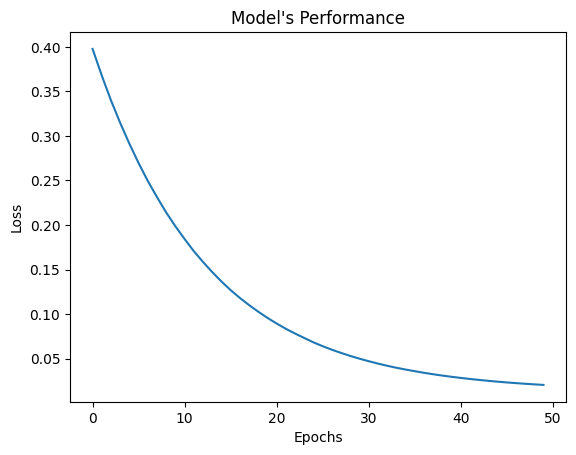

In [22]:
plt.plot(history.history["loss"])
plt.title("Model's Performance")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

## How to split the data to training set and validation set

Az validation dataset baraye in estefade mikonim ke bebenim model emoon rooye data i ke nadide chejuri amal mikone, chonke nabayd perofrmance model ro rooye training dataset check konim, balke bayad bebinim aya model emoon generalize (overfit nashe) mishe nesbat be dade haye dge.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized,
                                                    y_normalized,
                                                    test_size=0.2)

In [48]:
X_train.shape

(48,)

In [49]:
y_train.shape

(48,)

In [50]:
X_train.shape, X_test.shape

((48,), (12,))

In [51]:
# 1. Sakhtane model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(1,))
])

In [52]:
# 2. Compile the model
model_3.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.mse
)

In [53]:
# 3. Fit the model
history_3 = model_3.fit(X_train,
                        y_train,
                        epochs=50,
                        validation_data=(X_test, y_test))

Epoch 1/50
2/2 [==============================] - 0s 133ms/step - loss: 1.6285 - val_loss: 1.6738
Epoch 2/50
2/2 [==============================] - 0s 28ms/step - loss: 1.5011 - val_loss: 1.5367
Epoch 3/50
2/2 [==============================] - 0s 25ms/step - loss: 1.3784 - val_loss: 1.4117
Epoch 4/50
2/2 [==============================] - 0s 26ms/step - loss: 1.2686 - val_loss: 1.3063
Epoch 5/50
2/2 [==============================] - 0s 26ms/step - loss: 1.1728 - val_loss: 1.2023
Epoch 6/50
2/2 [==============================] - 0s 26ms/step - loss: 1.0796 - val_loss: 1.1067
Epoch 7/50
2/2 [==============================] - 0s 25ms/step - loss: 0.9954 - val_loss: 1.0241
Epoch 8/50
2/2 [==============================] - 0s 25ms/step - loss: 0.9198 - val_loss: 0.9419
Epoch 9/50
2/2 [==============================] - 0s 27ms/step - loss: 0.8484 - val_loss: 0.8695
Epoch 10/50
2/2 [==============================] - 0s 26ms/step - loss: 0.7813 - val_loss: 0.8015
Epoch 11/50
2/2 [===========

In [54]:
# X_test ro bebinim
X_test

array([ 0.25984371, -1.12598942, -0.08661457,  1.24147552,  0.37532981,
        1.5879338 , -0.95276028, -0.31758676,  1.12598942,  0.43307286,
       -1.41470466, -1.7034199 ])

In [55]:
# Make predictions on the test set
y_pred = model_3.predict(X_test)
y_pred

1/1 [==============================] - 0s 35ms/step


array([[ 0.21701972],
       [-0.91633   ],
       [-0.06631769],
       [ 1.0198091 ],
       [ 0.31146553],
       [ 1.3031466 ],
       [-0.77466124],
       [-0.2552093 ],
       [ 0.9253633 ],
       [ 0.35868844],
       [-1.1524445 ],
       [-1.388559  ]], dtype=float32)

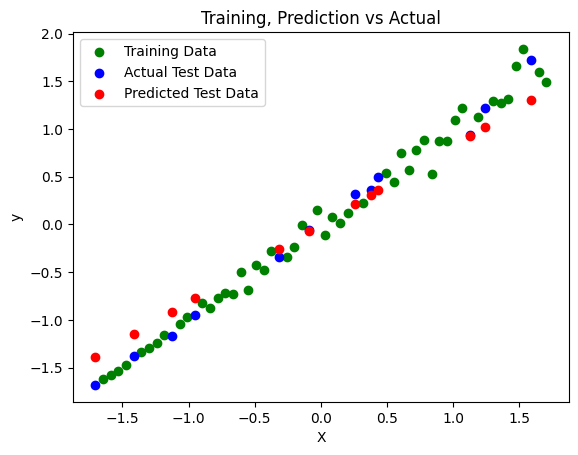

In [56]:
# Plot the results
plt.scatter(X_train, y_train, color='green', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Actual Test Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Test Data')
plt.title('Training, Prediction vs Actual')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import imageio
from sklearn.model_selection import train_test_split

# Generate and normalize data
X = np.linspace(-30, 60, 60)
slope = 3
intercept = 2
noise_intensity = 0.3
y = slope * X + intercept + np.random.randn(len(X)) * noise_intensity * np.arange(len(X))
X_normalized = (X - X.mean()) / X.std()
y_normalized = (y - y.mean()) / y.std()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='mean_squared_error')

# Custom callback to save weights
class SaveWeightsCallback(tf.keras.callbacks.Callback):
    def __init__(self, weights_list):
        super(SaveWeightsCallback, self).__init__()
        self.weights_list = weights_list

    def on_epoch_end(self, epoch, logs=None):
        weights, bias = self.model.layers[0].get_weights()
        self.weights_list.append((weights.flatten()[0], bias.flatten()[0]))

weights_list = []
save_weights_callback = SaveWeightsCallback(weights_list)

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[save_weights_callback])

# Generate plots for each epoch and save them
for epoch, (weight, bias) in enumerate(weights_list):
    y_pred = weight * X_normalized + bias
    plt.figure(figsize=(10, 6))
    plt.scatter(X_normalized, y_normalized, color='blue', label='Data')
    plt.plot(X_normalized, y_pred, color='red', label=f'Epoch {epoch}')
    plt.title(f'Prediction Line at Epoch {epoch}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.savefig(f'plot_epoch_{epoch}.png')
    plt.close()

# Compile the images into a GIF
images = []
for epoch in range(len(weights_list)):
    images.append(imageio.imread(f'plot_epoch_{epoch}.png'))
imageio.mimsave('model_training.gif', images, fps=15)


<ipython-input-44-d9e7afa56ff3>:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'plot_epoch_{epoch}.png'))


# Exercise
1. Yek data amade konin ke yek moadele daraje 2 hast. noise ro ham behesh ezafe konin.
2. yek neural network besazin ke input_shape=(1,) hast, bad Dense layer ba 4 neuron dare, bad yek Dense layer ba 1 neuron dare.
3. Data ro be 15% baraye validation va 85% baraye train taghsim konin.
4. Va model ro train konin va nemoodaresh ro rasm konin, training set, validation set va prediction ro ba rang haye mokhtalef va nemoodare scatter plot neshoon bedin.

* normalize kardane data faramoosh nashe.

## more complex regression problem

In [57]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
insurance = pd.read_csv(url)

In [66]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [67]:
# Manual preprocessing
# One-hot encode categorical variables
insurance_onehot = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'], drop_first=True)

In [68]:
insurance_onehot.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
